What are Sunspots?

Sunspots are phenomena on the Sun's photosphere that appear as temporary spots that are darker than the surrounding areas.
They are regions of reduced surface temperature caused by concentrations of magnetic flux that inhibit convection.
Sunspots appear within active regions, usually in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

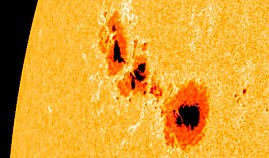

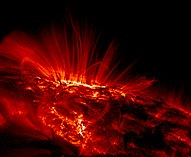

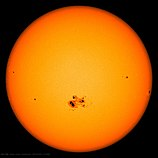

In [2]:
import csv
import datetime
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from itertools import product
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import dates as mpl_dates

In [3]:
warnings.filterwarnings(action = 'ignore')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

def plot_time_series(time, data_series, color='dodgerblue', label='data', linestyle='-', start_idx=0, end_idx=None):

    plt.style.use('seaborn')

    plt.plot(time[start_idx:end_idx], data_series[start_idx:end_idx], linestyle, color=color, label=label)

    plt.xlabel("Time")
    plt.ylabel("Data Series")

    plt.grid(True)

    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%b/%d/%Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.legend(loc='best')


In [6]:
df = pd.read_csv('/content/Sunspots.csv')
del df['Unnamed: 0']
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [7]:
timeseries = df
timeseries['Date'] = pd.to_datetime(df['Date'])
timeseries = df.set_index(df['Date'])
del timeseries['Date']
timeseries.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


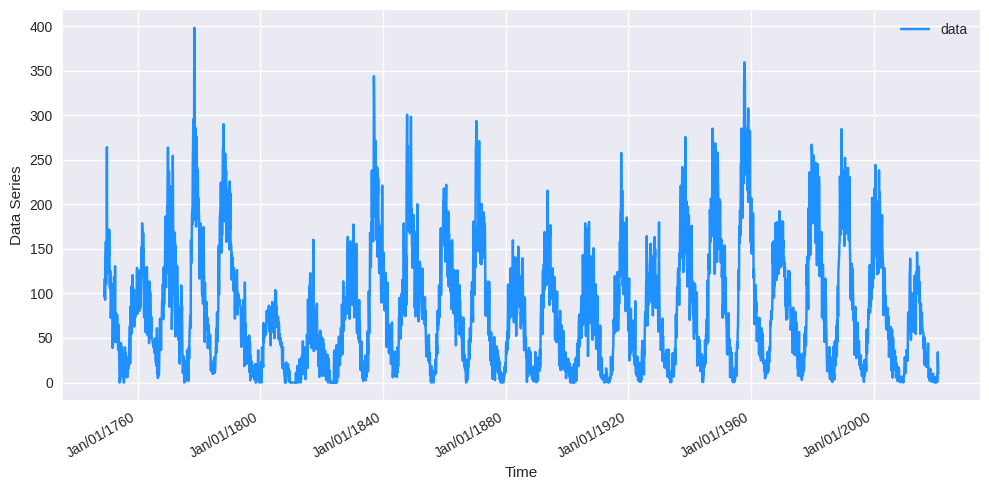

In [13]:
time_steps = []
sunspot_values = []

for time, value in zip(df['Date'], df['Monthly Mean Total Sunspot Number']):
    time_steps.append(time)
    sunspot_values.append(float(value))

plt.figure(figsize=(10, 5))

plot_time_series(time_step, sunspots)


In [25]:
def plot_time_series(time, series, col=None, lab=None, start=None, end=None):
    if start is None:
        start = 0
    if end is None:
        end = len(time)

    plt.plot(time[start:end], series[start:end], color=col, label=lab)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    if lab:
        plt.legend()


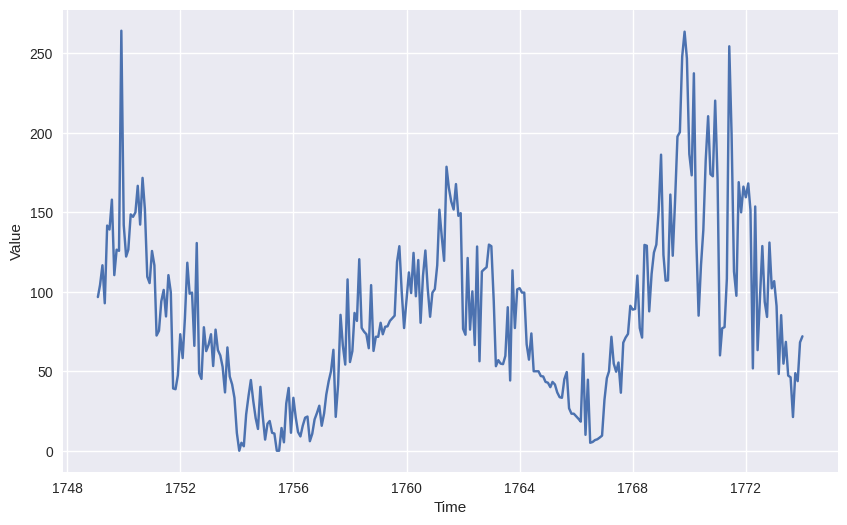

In [27]:
plt.figure(figsize=(10, 6))
plot_time_series(time_step, sunspots, start=0, end=300)

In [16]:
split_time = int(len(time_step)*0.8)
time_train = time_step[:split_time]
x_train = sunspots[:split_time]
time_valid = time_step[split_time:]
x_valid = sunspots[split_time:]

In [17]:
type(x_train)

list

In [18]:
split_time = int(len(time_step)*0.8)
train = timeseries[:split_time]
valid = timeseries[split_time:]

In [19]:
train.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [20]:
train.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1965-11-30', '1965-12-31', '1966-01-31', '1966-02-28',
               '1966-03-31', '1966-04-30', '1966-05-31', '1966-06-30',
               '1966-07-31', '1966-08-31'],
              dtype='datetime64[ns]', name='Date', length=2612, freq=None)

In [22]:
def plot_time_series(time, series, col=None, lab=None):
    plt.plot(time, series, color=col, label=lab)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    if lab:
        plt.legend()


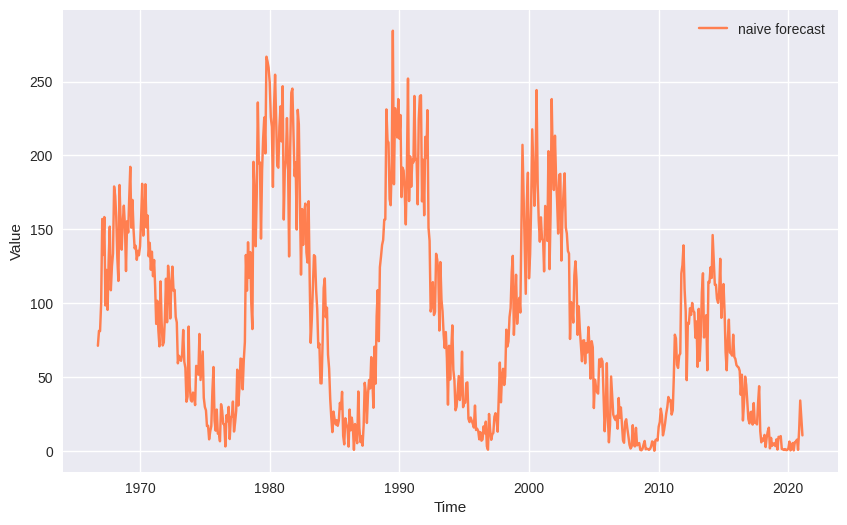

In [23]:
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid, col='coral', lab='naive forecast')

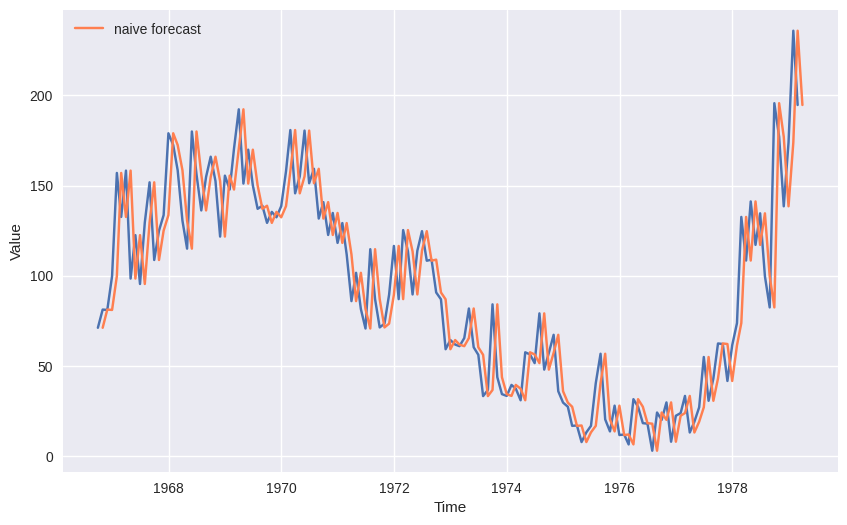

In [28]:
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid, start=0, end=150)
plot_time_series(time_valid, naive_forecast, start=1, end=151, col='coral', lab='naive forecast')


In [29]:
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

18.204596


Forecasting the model using Moving Average

In [30]:
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

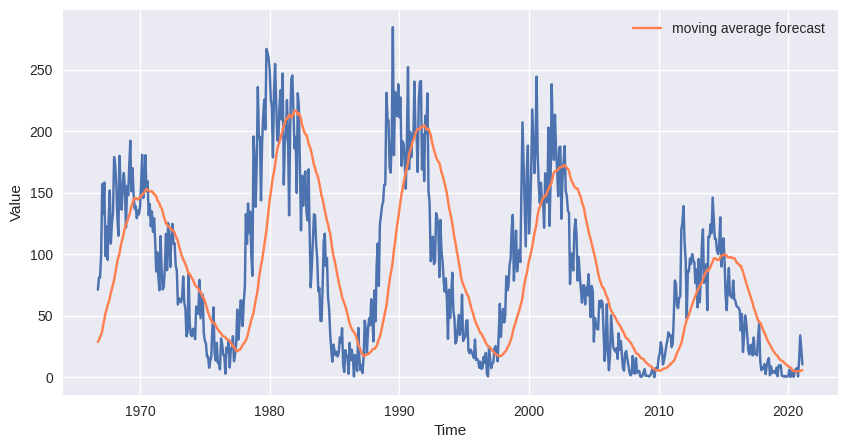

In [32]:
series = np.array(sunspots)
time = np.array(time_step)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 5))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, moving_avg, col = 'coral', lab = 'moving average forecast')

In [33]:
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

38.80930567835836


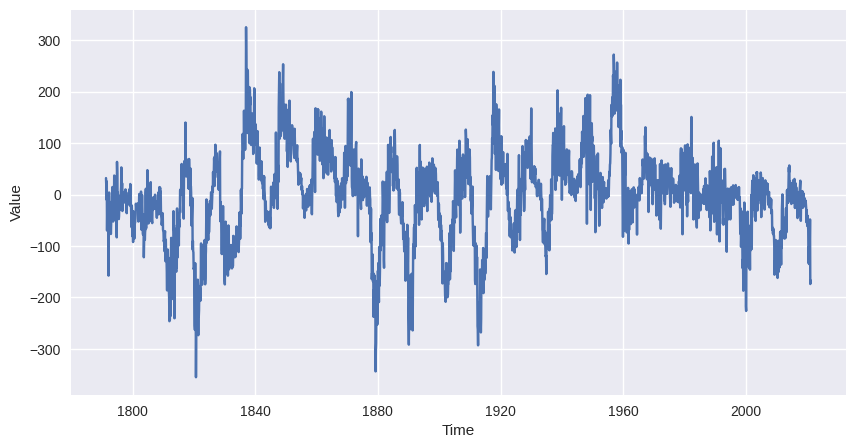

In [36]:
seasonality = 507
diff_series = (series[seasonality:] - series[:-seasonality])
diff_time = time[seasonality:]

plt.figure(figsize=(10, 5))
plot_time_series(diff_time, diff_series)
plt.show()

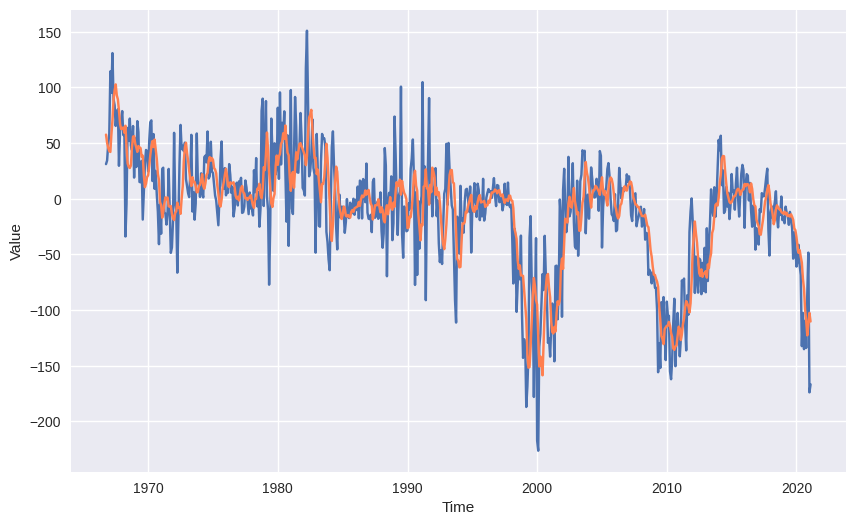

In [37]:
diff_moving_avg = moving_average_forecast(diff_series, 5)[split_time - seasonality - 5:]

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, diff_series[split_time - seasonality:])
plot_time_series(time_valid, diff_moving_avg, col = 'coral')
plt.show()

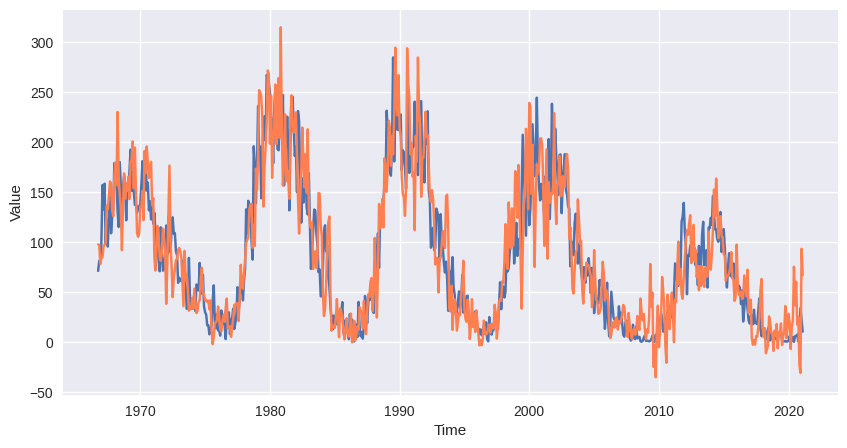

In [42]:
diff_moving_avg_plus_past = series[split_time - seasonality:-seasonality] + diff_moving_avg

plt.figure(figsize=(10, 5))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, diff_moving_avg_plus_past, col = 'coral')
plt.show()

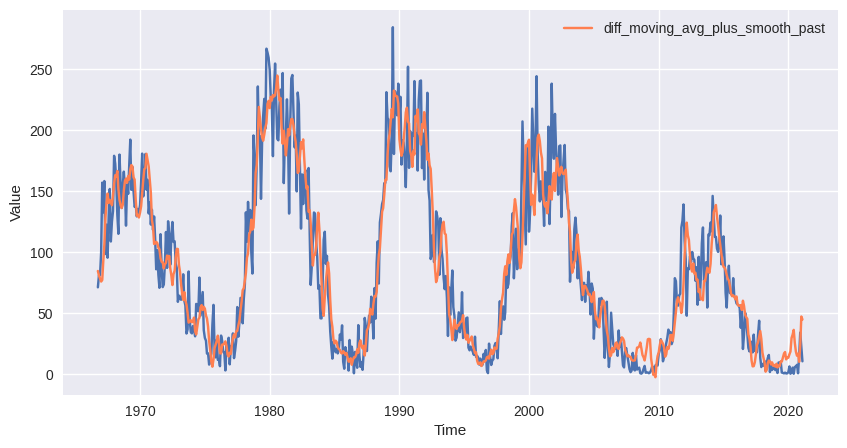

In [43]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - seasonality-5:-seasonality+5], 10) + diff_moving_avg

plt.figure(figsize=(10, 5))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, diff_moving_avg_plus_smooth_past, col = 'coral', lab = 'diff_moving_avg_plus_smooth_past')
plt.show()

In [44]:
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

18.602342947526143


Implementing SARIMA on the Sunspot Data

In [45]:
seasonpara = []
mae = []
window = []
for window_size in range(1,10):
    for seasonality in range(500, 600):
        diff_series = (series[seasonality:] - series[:-seasonality])
        diff_time = time[seasonality:]
        diff_moving_avg = moving_average_forecast(diff_series, window_size)[split_time - seasonality - window_size:]
        diff_moving_avg_plus_past = series[split_time - seasonality:-seasonality] + diff_moving_avg
        diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - seasonality-5:-seasonality+5], 10) + diff_moving_avg
        seasonpara.append(seasonality)
        mae.append(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
        window.append(window_size)

In [46]:
atrain = train.resample('A').sum()
avalid = valid.resample('A').sum()
avalid.head()

,Monthly Mean Total Sunspot Number
Date,
1966-12-31,333.1
1967-12-31,1591.8
1968-12-31,1799.4
1969-12-31,1793.3
1970-12-31,1778.7


In [47]:
# Defining a range of values for SARIMA model parameters
order_p_values = range(0, 3)
order_q_values = range(0, 3)
seasonal_p_values = range(0, 3)
seasonal_q_values = range(0, 3)
D = 1
d = 1

# Creating a list of parameter combinations
parameters = product(order_p_values, order_q_values, seasonal_p_values, seasonal_q_values)
parameters_list = list(parameters)
num_parameters = len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        order_param = (param[0], d, param[1])
        seasonal_order_param = (param[2], D, param[3], 11)

        model = sm.tsa.statespace.SARIMAX(atrain['Monthly Mean Total Sunspot Number'],
                                         order=order_param, seasonal_order=seasonal_order_param).fit(disp=-1)
    except ValueError:
        print('Wrong parameters are:', param)
        continue

    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param

    results.append([param, model.aic])


In [48]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                  218
Model:              SARIMAX(2, 1, 2)x(0, 1, [1], 11)   Log Likelihood               -1482.728
Date:                               Sun, 15 Oct 2023   AIC                           2977.456
Time:                                       14:14:02   BIC                           2997.424
Sample:                                   12-31-1749   HQIC                          2985.532
                                        - 12-31-1966                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5539      0.050     31.251      0.000       1.456       1.651
ar.L2         -0.8868      0.043    -20.643      0.000      -0.971      -0.803
ma.L1         -1.4108      0.080    -17.734      0.000      -1.567      -1.255
ma.L2          0.5273      0.081      6.512      0.000       0.369       0.686
ma.S.L11      -0.9951      1.533     -0.649      0.516      -3.999       2.009
sigma2       9.06e+04   1.36e+05      0.667      0.505   -1.76e+05    3.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                25.74
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.55
Prob(H) (two-sided):                  0.71   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

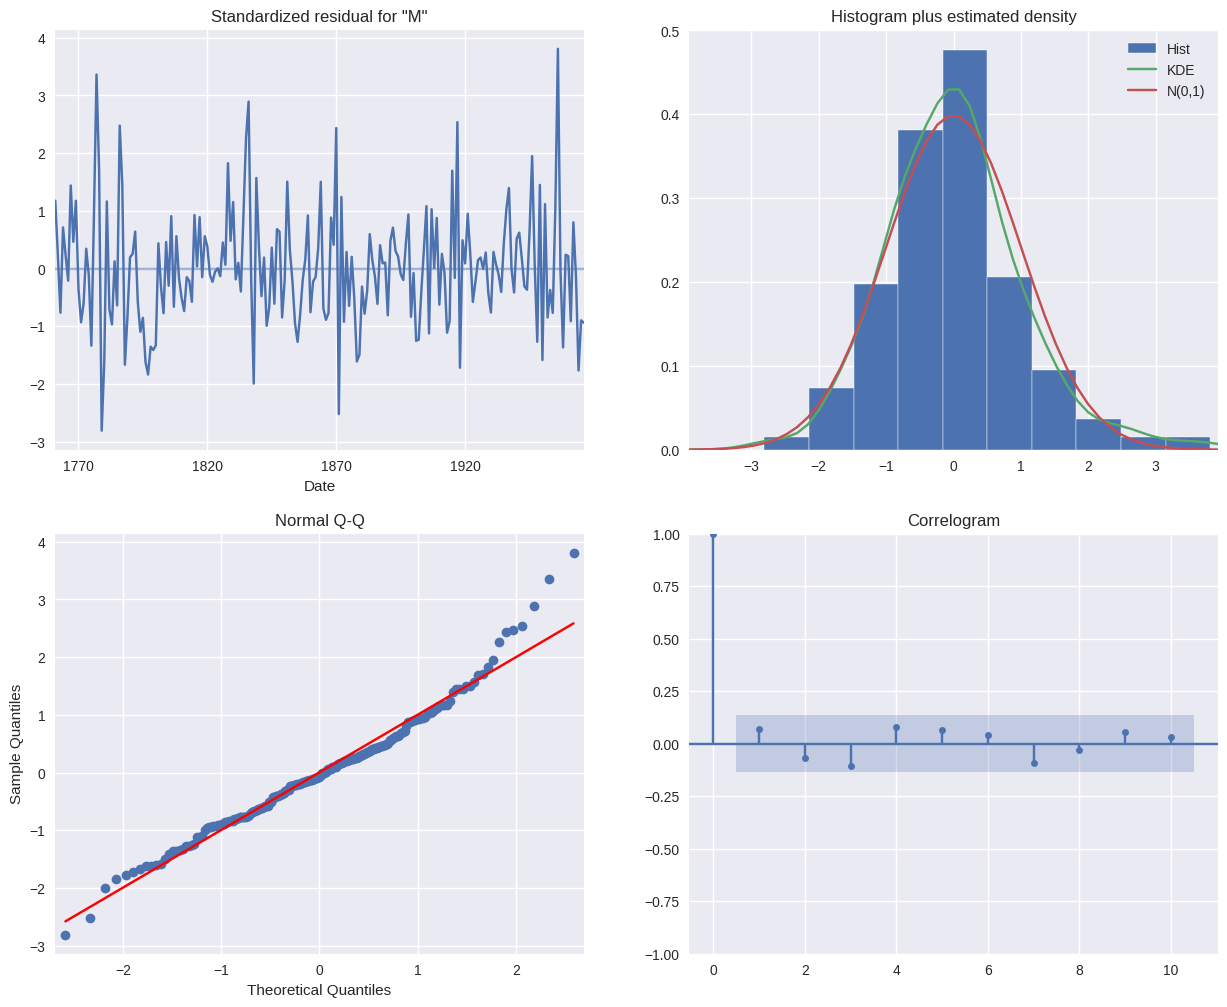

In [49]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

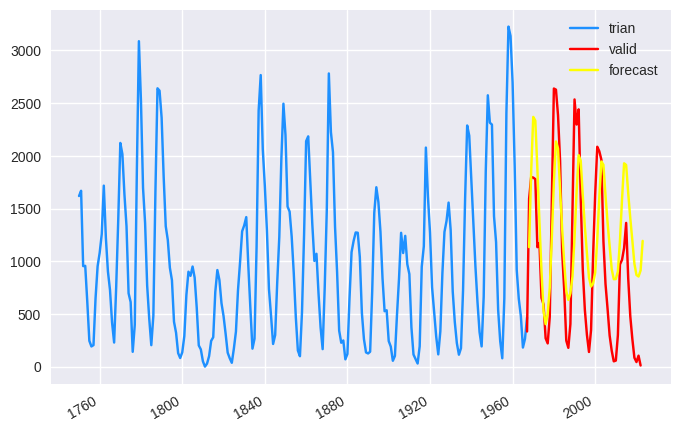

In [51]:
plt.plot(atrain,color = 'dodgerblue',label = 'trian')
plt.plot(avalid, color = 'r',label = 'valid')
best_model.forecast(len(avalid)).plot(color = 'yellow',label = 'forecast')
plt.legend(loc = 'best')
plt.show()

Forecasting sunspots using SARIMA

In [57]:
path = "/content/sunspot_data.csv"
filename = os.path.join(path,"sunspot_data.csv")
df = pd.read_csv('/content/sunspot_data.csv', delimiter=',', na_values=['-1'])
df.dataframeName = 'sunspot_data.csv'
del(df['Unnamed: 0'])
df.columns = ['year', 'month', 'day', 'fraction','sunspots', 'sdt', 'obs','indicator']
df.head(-5)

# Add the column time
df['time']=df[['year', 'month', 'day']].apply(lambda s: pd.datetime(*s),axis = 1)
# time column is the index of the dataframe
df.index = df['time']
# replace the Nan by linear interpolation
df['sunspots'].interpolate(method='linear', inplace=True)

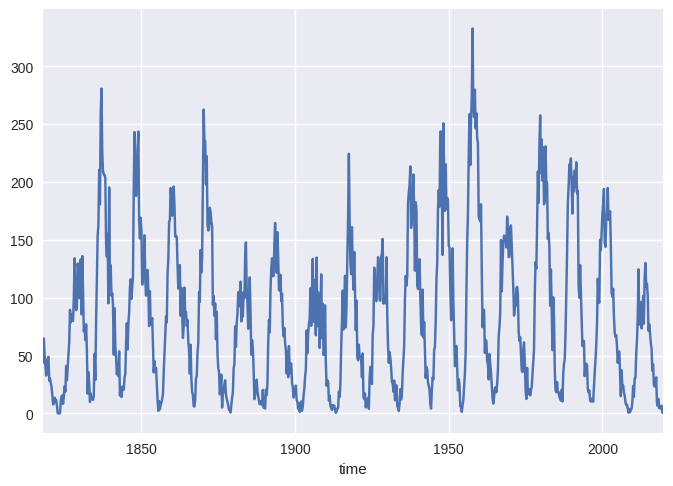

In [58]:
ts = pd.Series(data=df.sunspots, index=df.index)
#ts = ts['1900-01-01':]
ts_month = ts.resample('MS').mean()
ts_quarter = ts.resample('Q').mean()
ts_quarter.plot()
plt.show()

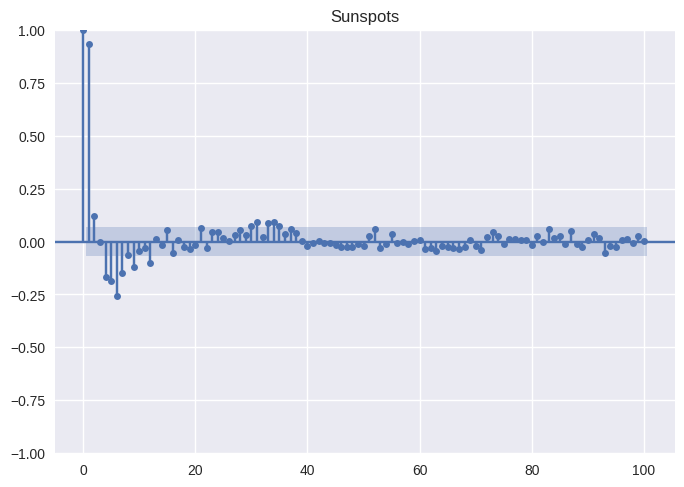

In [59]:
plot_pacf(ts_quarter,lags=100,title='Sunspots')
plt.show()

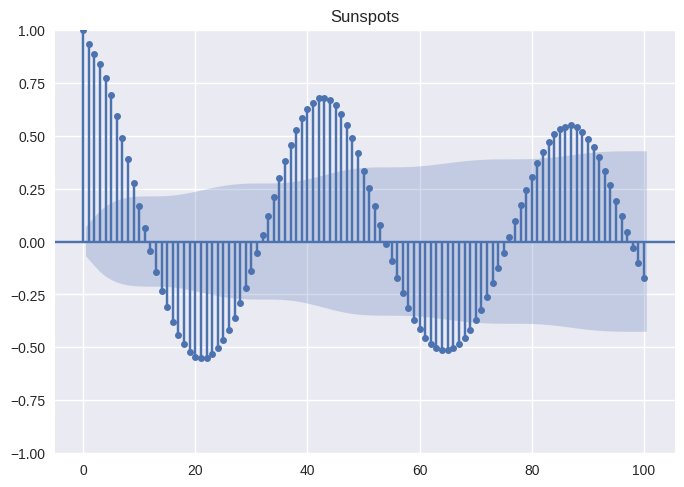

In [60]:
plot_acf(ts_quarter,lags=100,title='Sunspots')
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller
def printADFTest(serie):
    result = adfuller(serie, autolag='AIC')
    print("ADF Statistic %F" % (result[0]))
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print('\n')

printADFTest(ts_quarter)


ADF Statistic -9.778954
p-value: 6.814515890287507e-17
Critial Values:
   1%, -3.4385918508847646
Critial Values:
   5%, -2.865177791819505
Critial Values:
   10%, -2.568707096601096




In [62]:
model = sm.tsa.statespace.SARIMAX(ts_quarter, trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             sunspots   No. Observations:                  808
Model:             SARIMAX(3, 0, 10)x(1, 1, [], 43)   Log Likelihood               -3584.094
Date:                              Sun, 15 Oct 2023   AIC                           7198.189
Time:                                      14:38:23   BIC                           7267.787
Sample:                                  03-31-1818   HQIC                          7224.982
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8982      0.130      6.921      0.000       0.644       1.153
ar.L2          0.76

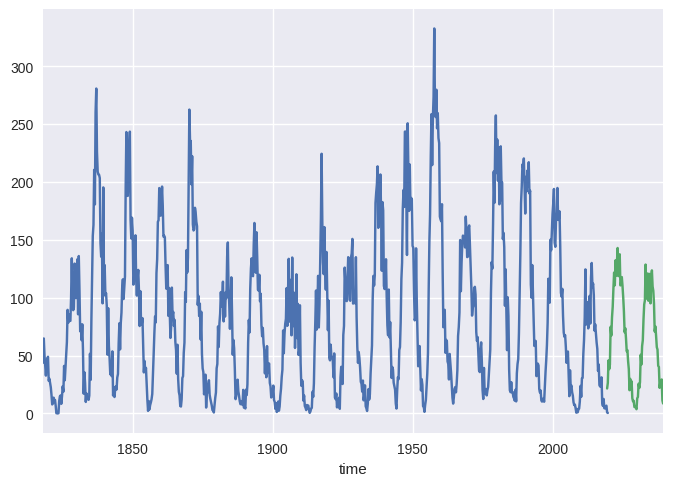

In [63]:
forecast = results.predict(start = ts_quarter.index[-2], end= ts_quarter.index[-2] + pd.DateOffset(months=240), dynamic= True)
ts_quarter.plot()
forecast.plot()
plt.show()